In [95]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('../../data/pre_processed.csv')

#### Renaming Columns

In [97]:
new_cols = {
    'protocolSection_identificationModule_nctId' : 'Id',
    'protocolSection_identificationModule_briefTitle' : 'Title',
    'protocolSection_statusModule_overallStatus' : 'Status',
    'protocolSection_sponsorCollaboratorsModule_leadSponsor_name' : 'Sponsor',
    'protocolSection_sponsorCollaboratorsModule_leadSponsor_class' : 'Sponsor_Class',
    'protocolSection_conditionsModule_conditions_0' : 'Conditions',
    'protocolSection_designModule_studyType' : 'Study_Type',
    'protocolSection_eligibilityModule_sex' : 'Sex',
    'protocolSection_eligibilityModule_stdAges_0' : 'Age_Category',
    'protocolSection_contactsLocationsModule_locations_0_city' : 'City',
    'protocolSection_contactsLocationsModule_locations_0_country' : 'Country',
    'hasResults' : 'Results',
    'protocolSection_armsInterventionsModule_interventions_0_name' : 'Interventions',
}

In [98]:
df.rename(columns=new_cols, inplace=True)

df.head()

,Id,Title,Status,Sponsor,Sponsor_Class,Conditions,Study_Type,Sex,Age_Category,City,Country,Results,Interventions,min_age,start_date_day,start_date_month,start_date_year,first_post_date_day,first_post_date_month,first_post_year
0,NCT01713764,A Pilot Study of the Effects of Diet and Behav...,COMPLETED,"University of California, San Francisco",OTHER,Diabetes Type II,INTERVENTIONAL,ALL,ADULT,San Francisco,United States,False,Low Carbohydrate Diet,18,1,10,2012,25,10,2012
1,NCT04011904,The Role of Traditional or Western Diet in the...,COMPLETED,University of Copenhagen,OTHER,T2D,INTERVENTIONAL,ALL,ADULT,Copenhagen,Denmark,False,Cross-over study,18,15,4,2019,9,7,2019
2,NCT05767372,Effect of Coherent Breathing on Elderly Qualit...,COMPLETED,Cairo University,OTHER,Stable Diabetes Mellitus,INTERVENTIONAL,ALL,ADULT,Cairo,Egypt,False,Coherent Breathing Exercise,60,1,3,2023,14,3,2023
3,NCT03194152,Peanut Consumption and Cardiovascular Disease ...,COMPLETED,Harvard School of Public Health (HSPH),OTHER,T2D,INTERVENTIONAL,ALL,ADULT,Shanghai,China,False,Peanut,20,24,10,2017,21,6,2017
4,NCT04790526,Dose Response of Eccentric Exercise on Glycemi...,COMPLETED,Riphah International University,OTHER,Type II Diabetes Mellitus,INTERVENTIONAL,ALL,ADULT,Lahore,Pakistan,False,Eccentric Exercises Dose,45,12,7,2021,10,3,2021


In [99]:
def get_val(x):
    if x == False:
        return 'Passed'
    else:
        return 'Failed'

df['Results'] = df['Results'].apply(lambda x : get_val(x))

In [100]:
df.shape

(5739, 20)

In [101]:
output_feature = 'Results'
num_cols = ['min_age']
date_time_cols = [col for col in df.columns if col not in num_cols and df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

cat_cols

['Id',
 'Title',
 'Status',
 'Sponsor',
 'Sponsor_Class',
 'Conditions',
 'Study_Type',
 'Sex',
 'Age_Category',
 'City',
 'Country',
 'Results',
 'Interventions']

### Numerical Columns

In [102]:
num_cols

['min_age']

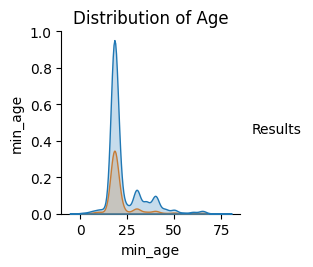

In [103]:
sns.pairplot(data=df[[num_cols[0], 'Results']], hue=output_feature)
plt.title('Distribution of Age')
plt.show()

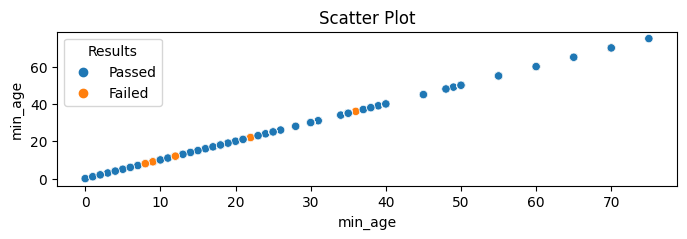

In [104]:
plt.figure(figsize=(8,2))
sns.scatterplot(data=df, x=num_cols[0], y=num_cols[0], hue=output_feature)
plt.title('Scatter Plot')
plt.show()

Above Age 40, there are no failed studies. This is due to class imbalance or there is a actual relationship between studies not failing and higher minimum Age.

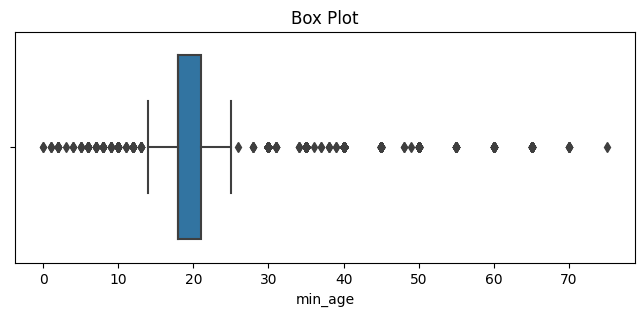

In [105]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df, x=num_cols[0], hue=output_feature)
plt.title('Box Plot')
plt.show()

1. Age is right skewed, one of the reasons SVC failed.
2. we will be creating two dataset with the outliers and one without them to see which produce better models.
3. Also we are using tree base ensemble techniques which are robust to outliers so we dont need to worry about these, but the reason behind creating another dataset without them is to see if there is no such realation between age and studies failing then these outliers are providing wrong information to the models.

### Categorical Columns

In [106]:
cat_cols

['Id',
 'Title',
 'Status',
 'Sponsor',
 'Sponsor_Class',
 'Conditions',
 'Study_Type',
 'Sex',
 'Age_Category',
 'City',
 'Country',
 'Results',
 'Interventions']

Dropping Id as it does not bring much information to the table.

In [107]:
df.drop('Id', axis=1, inplace=True)

cat_cols.remove('Id')

In [108]:
print('Number of unique values')
for col in cat_cols:

    print('{} : {}'.format(col, len(df[col].unique())))

Number of unique values
Title : 5716
Status : 1
Sponsor : 1575
Sponsor_Class : 7
Conditions : 588
Study_Type : 2
Sex : 3
Age_Category : 3
City : 1404
Country : 102
Results : 2
Interventions : 3728


Looking at the above numbers there are features which have higher number of unique values, indicating higher cardinality. This makes it difficult in feature encoding phase. Also there will be class imbalance between the those features as well which will make our model more biased toward those classes. My take towards these features is that we will keep an eye on these features while feature selection and if they are not significant enough we can consider dropping these.

In [109]:
df.drop('Status', axis=1, inplace=True)

df.head()

,Title,Sponsor,Sponsor_Class,Conditions,Study_Type,Sex,Age_Category,City,Country,Results,Interventions,min_age,start_date_day,start_date_month,start_date_year,first_post_date_day,first_post_date_month,first_post_year
0,A Pilot Study of the Effects of Diet and Behav...,"University of California, San Francisco",OTHER,Diabetes Type II,INTERVENTIONAL,ALL,ADULT,San Francisco,United States,Passed,Low Carbohydrate Diet,18,1,10,2012,25,10,2012
1,The Role of Traditional or Western Diet in the...,University of Copenhagen,OTHER,T2D,INTERVENTIONAL,ALL,ADULT,Copenhagen,Denmark,Passed,Cross-over study,18,15,4,2019,9,7,2019
2,Effect of Coherent Breathing on Elderly Qualit...,Cairo University,OTHER,Stable Diabetes Mellitus,INTERVENTIONAL,ALL,ADULT,Cairo,Egypt,Passed,Coherent Breathing Exercise,60,1,3,2023,14,3,2023
3,Peanut Consumption and Cardiovascular Disease ...,Harvard School of Public Health (HSPH),OTHER,T2D,INTERVENTIONAL,ALL,ADULT,Shanghai,China,Passed,Peanut,20,24,10,2017,21,6,2017
4,Dose Response of Eccentric Exercise on Glycemi...,Riphah International University,OTHER,Type II Diabetes Mellitus,INTERVENTIONAL,ALL,ADULT,Lahore,Pakistan,Passed,Eccentric Exercises Dose,45,12,7,2021,10,3,2021


Dropping Status columns as all the studies are compleleted and it has only one unique value in it, which has very less significance.

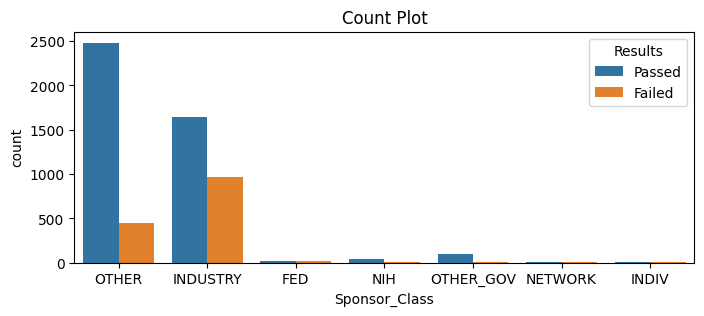

In [110]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x='Sponsor_Class', hue=output_feature)
plt.title('Count Plot')
plt.show()

In [111]:
print('Studies other than OTHER and INDUSTRY Sponsor Classe are : {}'.format(len(df[(df['Sponsor_Class'] != 'OTHER') & (df['Sponsor_Class'] != 'INDUSTRY')])
/ len(df) * 100))

print('Studies of OTHER and INDUSTRY Sponsor_Class are : {}'.format(len(df[(df['Sponsor_Class'] == 'OTHER') | (df['Sponsor_Class'] == 'INDUSTRY')])/len(df) * 100 ))

Studies other than OTHER and INDUSTRY Sponsor Classe are : 3.484927687750479
Studies of OTHER and INDUSTRY Sponsor_Class are : 96.51507231224952


Studies of OTHER and INDSUTRY Sponsor_Class have high number of data compared to others, which is creating bias towards them when this data is feed to our model. This might be one of the reason our models were slightly overfitting. One way to handle these is by creating more data poitns for other classes as well but it would lead to cearting more synthetic data which does not resemble actual pattern of the live/Producation data which may reduce performance of our model.

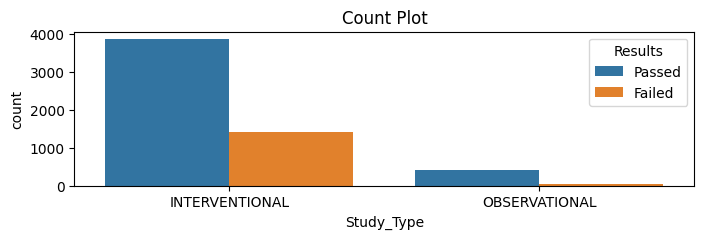

In [112]:
plt.figure(figsize=(8,2))
sns.countplot(data=df, x='Study_Type', hue=output_feature)
plt.title('Count Plot')
plt.show()

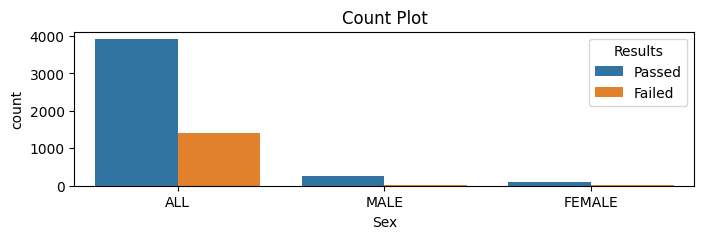

In [113]:
plt.figure(figsize=(8,2))
sns.countplot(data=df, x='Sex', hue=output_feature)
plt.title('Count Plot')
plt.show()

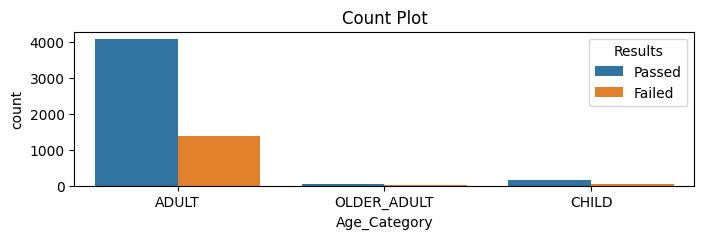

In [114]:
plt.figure(figsize=(8,2))
sns.countplot(data=df, x='Age_Category', hue=output_feature)
plt.title('Count Plot')
plt.show()

Same goes for Study Type, Sex and Age_Category as well.

In [135]:
print('Top 5 Cities with Passed Studies are :')
df[df['Results'] == 'Passed']['City'].value_counts()[0:5]

Top 5 Cities with Passed Studies are :


City
Seoul          119
Beijing         79
Birmingham      66
Neuss           65
Chula Vista     60
Name: count, dtype: int64

In [136]:
print('Top 5 Cities with Failed Studies are :')
df[df['Results'] == 'Failed']['City'].value_counts()[0:5]

Top 5 Cities with Failed Studies are :


City
Birmingham     125
Phoenix         40
Chula Vista     39
Beijing         37
Boston          35
Name: count, dtype: int64

In [137]:
print('Top 5 Countries with Passed Studies are :')
df[df['Results'] == 'Passed']['Country'].value_counts()[0:5]

Top 5 Countries with Passed Studies are :


Country
United States    1264
China             264
Germany           254
Denmark           227
Canada            210
Name: count, dtype: int64

In [138]:
print('Top 5 Countries with Failed Studies are :')
df[df['Results'] == 'Failed']['Country'].value_counts()[0:5]

Top 5 Countries with Failed Studies are :


Country
United States    986
Japan             93
China             67
Germany           41
Canada            32
Name: count, dtype: int64

In [145]:
df[df['Results'] == 'Passed']['Interventions'].value_counts()[0:5]

Interventions
Placebo            51
Metformin          36
vildagliptin       36
Vildagliptin       35
insulin detemir    34
Name: count, dtype: int64

In [146]:
df[df['Results'] == 'Failed']['Interventions'].value_counts()[0:5]

Interventions
Placebo          55
Dapagliflozin    43
Saxagliptin      29
liraglutide      23
Tirzepatide      21
Name: count, dtype: int64

Top 5 Contries for Passed and Failed are almost the same this might be because of dataset having more data points for those contries.
Which cannot be said for the cities and Interventions as Top 5 cities for passed and failed studies differ.

<H3><b>Conclusions and Observations<b></H3>

<p>1. We will be creating two datasets, one with the outliers and one without them.</p>
<p>2. Will observe all features with high cardinality while feature selection.</p>
<p>3. Will drop 'Status', 'Id' columns.</p>
<p>4. EDA is never ending there is always more to do in EDA. This was done just to get a overview of the dataset and draw some conclusions.</p>
<p>5. Also there is good amount of scope in feature engineering on the features with high cardinality, they can be grouped into subgropus which will reduce the cardinality and model will be able to find patterns more easliy. As our models are not sturggling to find patterns i am choosing to not give more attention to feature engineering. If we fail to imporve models performance we can always change the approach.</p>